In [16]:
import tensorflow as tf

In [17]:
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential

In [18]:
cnn = Sequential()

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
cnn.add(Conv2D(32,(3,3),input_shape = (64,64,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(16,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Flatten())

C:\Users\jpjai\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
cnn.add(Dense(64,activation='relu'))
cnn.add(Dense(32,activation='relu'))
cnn.add(Dense(16,activation='relu'))
cnn.add(Dense(8,activation='relu'))
cnn.add(Dense(4,activation='relu'))
cnn.add(Dense(1,activation='sigmoid'))

In [22]:
cnn.compile(optimizer='adam', loss='binary_crossentropy')

In [23]:
train_datagen = ImageDataGenerator(rescale= 1./255, shear_range= 0.2, zoom_range= 0.2, horizontal_flip= True)
test_datagen = ImageDataGenerator(rescale= 1./255)
train_data= train_datagen.flow_from_directory(r"C:\data science\ml project\cats_and_dogs\cats_and_dogs\train" , target_size= (64,64), batch_size=32, class_mode= 'binary')
test_data= test_datagen.flow_from_directory(r"C:\data science\ml project\cats_and_dogs\cats_and_dogs\test" , target_size= (64,64), batch_size=32, class_mode= 'binary')
cnn.fit( train_data, steps_per_epoch=200, epochs=10, validation_data= test_data)     #do epochs = 50

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - loss: 0.6941 - val_loss: 0.6912
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.6906 - val_loss: 0.6733
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.6825 - val_loss: 0.7012
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.6779 - val_loss: 0.6830
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.6484 - val_loss: 0.6051
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.6207 - val_loss: 0.5967
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.5972 - val_loss: 0.6010
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.5637 - val_loss: 0.6235
Epoch 9/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.5507 - val_loss: 0.5618
Epoch 10/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.5453 - val_loss: 0.5339


In [30]:
from keras.preprocessing import image

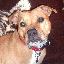

In [31]:
img= image.load_img(r"C:\data science\ml project\cats_and_dogs\cats_and_dogs\predict\2.jpg", target_size=(64,64))
img

In [32]:
img= image.img_to_array(img)

In [33]:
import numpy as np
img= np.expand_dims(img, axis=0)

In [34]:
p= cnn.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [29]:
if p[0][0] < 0.5 :
    print('Dog')
else:
    print('Cat')

Cat
